# Try Paramak and OpenMC

Name : Husni Naufal Zuhdi (413821)

In [1]:
# Impor semua paket yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import openmc
import paramak
import paramak_neutronics as nparamak
import neutronics_material_maker as nmm

from jupyter_cadquery.cadquery import (PartGroup, Part, Edges, Faces, Vertices, show)
from jupyter_cadquery import set_sidecar, set_defaults, reset_defaults

Overwriting auto display for cadquery Workplane and Shape


In [2]:
red_part = paramak.ExtrudeMixedShape(
    points=[
        (-89.0, -50.0, 'straight'),
        (-18.0, -50.0, 'straight'),
        (30.0, 30.0, 'straight'),
        (-12.0, 100.0, 'circle'),
        (88.0, -50.0, 'circle'),
    ],
    distance=10,
    color=(1,0,0),
    name='red_part',
    material_tag='red_part_material',
    stp_filename='red_part.stp',
    stl_filename='red_part.stl',
)
red_part.show()

In [3]:
grey_part = paramak.ExtrudeMixedShape(
    points=[
        (-96.5, -27.0, 'straight'),
        (-30.0, -27.0, 'straight'),
        (3.0, 30.0, 'straight'),
        (-30.0, 87.0, 'straight'),
        (-50.0, 87.0, 'straight'),
        (-30.0, 87.0, 'circle'),
        (-97.0, 30.0, 'circle'),
    ],
    distance=10,
    color=(0.5,0.5,0.5),
    name='grey_part',
    material_tag='grey_part_material',
    stp_filename='grey_part.stp',
    stl_filename='grey_part.stl',
)
grey_part.show()

In [4]:
both_parts = paramak.Reactor([red_part, grey_part])
both_parts.show()

In [5]:
# both_parts.export_stl(output_folder='0-trial-paramak-openmc')
both_parts.export_stl()

Saved file as  graveyard.stl


['red_part.stl', 'grey_part.stl', 'graveyard.stl']

In [6]:
# both_parts.export_stp(output_folder='0-trial-paramak-openmc')
both_parts.export_stp()


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : red_part.stp(453 ents)  Write  Done

*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : grey_part.stp(461 ents)  Write  Done
Saved file as 
*******************************************************************
******        Statistics on Transfer (Write)                

['red_part.stp', 'grey_part.stp', 'graveyard.stp']

** WorkSession : Sending all data
 Step File Name : graveyard.stp(781 ents)  Write  Done


In [7]:
source = openmc.Source()
source.space = openmc.stats.Point((0, 50, 0))
source.energy = openmc.stats.Discrete([14e6], [1])
source.angle = openmc.stats.Isotropic()

/home/husninaufalz/.local/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another MeshBase instance already exists with id=1.
  warn(msg, IDWarning)
/home/husninaufalz/.local/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another MeshBase instance already exists with id=2.
  warn(msg, IDWarning)
/home/husninaufalz/.local/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another MeshBase instance already exists with id=3.
  warn(msg, IDWarning)
/home/husninaufalz/.local/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another MeshBase instance already exists with id=4.
  warn(msg, IDWarning)
/home/husninaufalz/.local/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Filter instance already exists with id=39.
  warn(msg, IDWarning)
/home/husninaufalz/.local/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Filter instance already exists with id=41.
  warn(msg, IDWarning)
/home/husninaufalz/.local/lib/python3.8/si

Saved file as  red_part.stl
Saved file as  grey_part.stl
Saved file as  graveyard.stl
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
               

PosixPath('/home/husninaufalz/iter-tritium-breeding-xgboost/jupyter-notebooks/statepoint.10.h5')

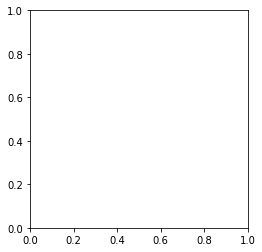

In [10]:
my_model = nparamak.NeutronicsModel(
    geometry=both_parts,
    source=source,
    simulation_batches=10,  # this should be increased to get a better mesh tally result
    simulation_particles_per_batch=1000,  # this should be increased to get a better mesh tally result
    materials = {'red_part_material':'P91', 'grey_part_material':'Li4SiO4'},
    mesh_tally_3d=['(n,Xt)','heating'],
    mesh_tally_2d=['(n,Xt)','heating'],
    cell_tallies=['(n,Xt)','heating', 'spectra'],
)

my_model.simulate()